In [1]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.exposure as exposure
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot 
from glob import iglob
import geopandas as gpd
from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
from osgeo import gdal
import prosail
from prosail import spectral_lib
import numpy as np
import numpy.matlib
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.pipeline import Pipeline

In [2]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset1.xlsx"
df = pd.read_excel(dataframe)
df.shape

(149, 2102)

In [3]:
# Split data into features (X) and response (y)
X = df.iloc[:, 1:] 
y = df.loc[:,["carotenoid"]]

# Inversion of selected bands using Look-up Table (LUT)

### First a function for better control of the PROSPECT call

In [4]:
np.random.seed(0)
krange=100000
n= 1.2
chloro= 5 + rand(krange)*80
caroten= 2 + rand(krange)*15
brown=0
EWT= 0.001 + rand(krange)* 0.021
LMA= 0.001 + rand(krange)* 0.016

In [5]:
rho = np.zeros((krange,2101))
for i in range(krange):
    wl, rho[i,:], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT[i], LMA[i], prospect_version='5')

In [6]:
df1 = pd.DataFrame(rho.reshape(-1, 2101), columns=list(wl))

### Calculate RMSE between simulated and measured

In [7]:
meas=np.array(X)#/np.mean(np.array(X))*np.mean(np.array(df))
car = []
for i in np.arange(149):
    mses=np.sum((np.array(df1)-meas[i,:])**2,axis=1)
    ind=np.argmin(mses)
    car.append(caroten[ind])
    print(ind, mses[ind])
    
car = pd.DataFrame(car, columns = ['caroten'])

21390 11.602302102992688
21390 8.661362552692044
11451 8.687475887099339
15799 8.099027283197298
99900 8.36436089484367
43166 2.3614529180274606
26111 8.14216398570618
26111 6.0866999289940225
80322 8.413130345384126
30179 11.579845721875301
92582 4.686101913337996
92582 6.313032112905275
81058 8.159139529058809
87908 7.279165144874803
50206 4.809137082175827
63241 3.7146065698694475
56077 8.666169238382055
18372 5.681381352980656
52490 3.3444080917612653
63241 8.067325852150411
75166 6.966186552122345
58775 17.63026474389942
15799 15.151102811153411
82144 4.129191724377684
62717 7.6597964031549495
40358 4.6419832853415475
52224 6.1496266810159845
6157 14.68008610403308
52224 7.493006072195605
52224 5.286732117958397
67720 34.47202404618251
59980 15.359809896997948
2929 13.251699761353605
78930 15.325484398456677
79410 8.280342102003276
83941 9.995904377542402
52224 12.58224889486111
2929 10.885916510857777
25682 11.544965234971615
67720 16.231633383177737
36922 3.42398271395825
78561 

### Plot the measured against the simulated

In [8]:
new_data_simulated = df1.T
new_data_measured = X.T

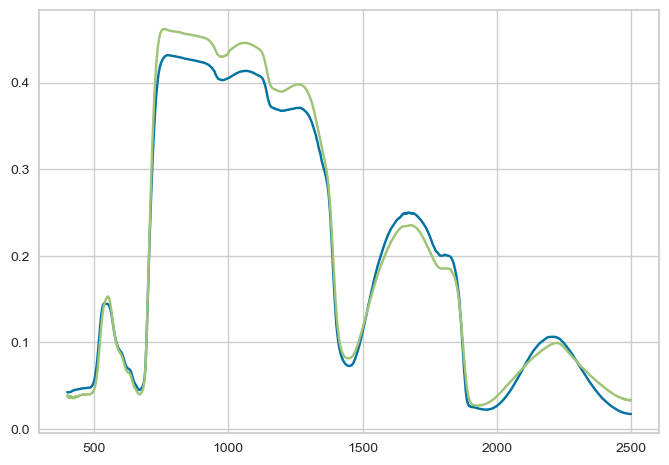

In [9]:
best_simulated = new_data_simulated[[83215]]
plt.plot(best_simulated);
plt.plot(np.arange(400,2501),meas[148,:])

### Plot scatter plot for simulated against measured 

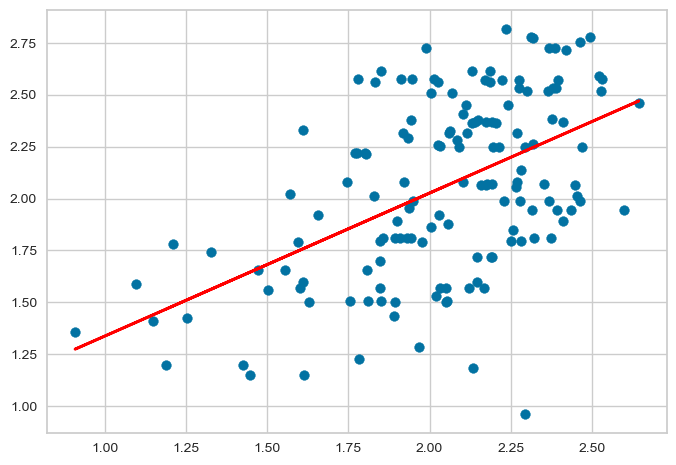

In [10]:
carot = pd.concat([y, car], axis = 1)

a, b = np.polyfit(np.log(carot['carotenoid']), np.log(carot['caroten']), deg = 1)
ax1 = carot['carotenoid']
ax2 = carot['caroten']

plt.scatter(np.log(ax1), np.log(ax2))
plt.plot(np.log(ax1), a*np.log(ax1)+b, color='red', linestyle='-', linewidth=2)

#### Accuracy Score %

In [11]:
corr_matrix = numpy.corrcoef(np.log(ax1), np.log(ax2))
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.267299554544149


# Inversion of selected bands using Look-up Table (LUT)

#### Select the bands from measured and simulated

In [12]:
sel_bands_measured_LUT = df[[519, 520, 521, 522, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]
sel_bands_simulated_LUT = df1[[519, 520, 521, 522, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]

#### Calculate RMSE between simulated and measured

In [13]:
meas=np.array(sel_bands_measured_LUT)
car = []
for i in np.arange(149):
    mses=np.sum((np.array(sel_bands_simulated_LUT)-meas[i,:])**2,axis=1)
    ind=np.argmin(mses)
    car.append(caroten[ind])
    print(ind, mses[ind])
    
car_sel_LUT = pd.DataFrame(car, columns = ['caroten'])

72787 0.021757507161160997
38704 0.006180291425417187
33068 0.003175170644240386
4661 0.0026667442602584333
13885 0.00527702877580986
90757 0.0009743387376868768
74688 0.004985481901174671
19558 0.0016832041664297346
92010 0.004557043933352123
1599 0.0051326877246849565
95371 7.559477185902505e-05
22589 0.00026494599664725446
87291 0.0002772170915829045
67181 0.0002176793469315747
50372 0.00013060781649084784
64566 0.00015205978342035028
81679 0.00028710566299840407
42100 0.00014596604231895488
26945 0.0001354519792906104
45260 0.00026167422490238685
69084 0.0006684950065366454
59165 0.00025606382883823205
30863 0.0004676633259060956
54929 0.0013056163796007101
67408 0.00034859381902633993
86351 0.0011122664923539287
38899 0.0004976855863773087
20532 0.0005895276628423152
65802 0.0002956416031588533
77841 7.660860273306391e-05
1599 0.008571700602822582
70014 0.004919838744458702
33430 8.831675586700348e-05
21862 0.0001932758984440584
75506 0.0002319239906321624
89476 0.0002980138121524

#### Transpose both measured and simulated 

In [14]:
new_sel_measured_LUT = sel_bands_measured_LUT.T
new_sel_simulated_LUT = sel_bands_simulated_LUT.T

#### Plot the measured against the simulated

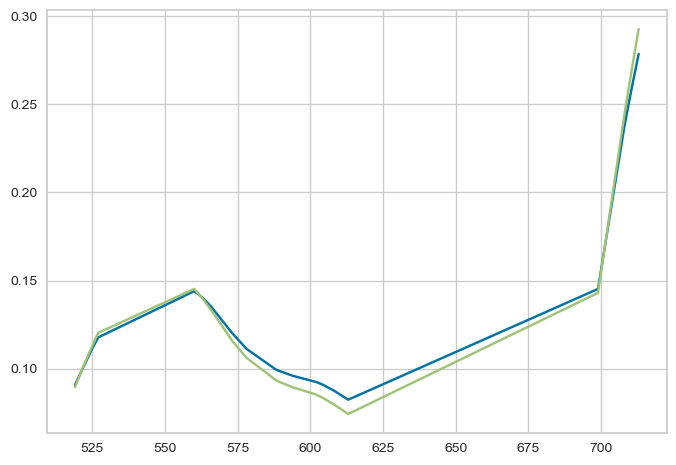

In [15]:
best_sel_simulated_LUT = new_sel_simulated_LUT[[94759]]
plt.plot(best_sel_simulated_LUT);
plt.plot(sel_bands_simulated_LUT.columns, meas[148,:])

#### Plot scatter plot for simulated against measured

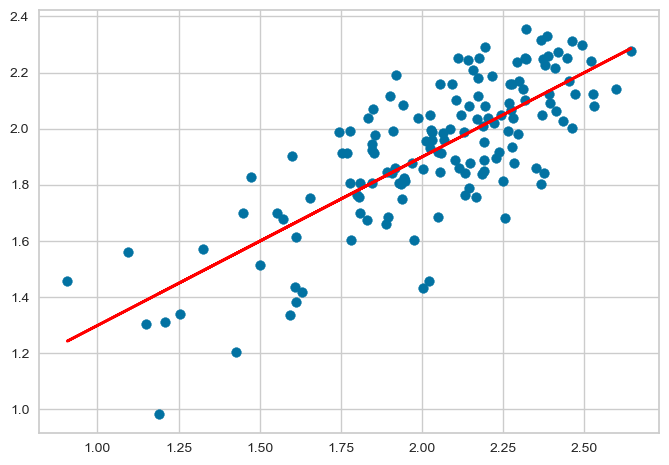

In [16]:
sel_car_LUT = pd.concat([y, car_sel_LUT], axis = 1)

a, b = np.polyfit(np.log(sel_car_LUT['carotenoid']), np.log(sel_car_LUT['caroten']), deg = 1)
ax1 = sel_car_LUT['carotenoid']
ax2 = sel_car_LUT['caroten']

plt.scatter(np.log(ax1), np.log(ax2))
plt.plot(np.log(ax1), a*np.log(ax1)+b, color='red', linestyle='-', linewidth=2)

#### Accracy score %

In [17]:
corr_matrix = numpy.corrcoef(np.log(ax1), np.log(ax2))
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.5818588291536347


# Inversion of selected bands using Random Forest Regression (RFR)

In [18]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset1.xlsx"
df1 = pd.read_excel(dataframe)

In [19]:
measured_X = df.iloc[:, 1:]
measured_y = df.iloc[:,0]

In [20]:
np.random.seed(0)
krange=100000
n= 1.2
chloro= 5 + rand(krange)*80
caroten= 2 + rand(krange)*15
brown=0
EWT= 0.001 + rand(krange)* 0.021
LMA= 0.001 + rand(krange)* 0.016

In [21]:
rho = np.zeros((krange,2105)) #made it 2102 instaed of 2101 because i included chlorophll, carotenoid, water content and dry matter
for i in range(krange):
    wl, rho[i,0:2101], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT[i], LMA[i], prospect_version='5')
    rho[i,-4]=chloro[i]
    rho[i,-3]=caroten[i]
    rho[i,-2]=EWT[i]
    rho[i,-1]=LMA[i]
    

In [22]:
wl = range(400, 2505) #made it 2505 instaed of 2501 because i included chlorophll, carotenoid, water content and dry matter

In [23]:
df2 = pd.DataFrame(rho, columns=list(wl))
df2 = df2.rename(columns = {2501: 'Chloro'})
df2 = df2.rename(columns = {2502: 'caroten'})
df2 = df2.rename(columns = {2503: 'EWT'})
df2 = df2.rename(columns = {2504: 'LMA'})

In [24]:
df2_selected = df2[[519, 520, 521, 522, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]

In [25]:
simulated_X = df2_selected
simulated_y = df2.iloc[:, -3]
measured_X = X[[519, 520, 521, 522, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]

In [26]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=100, random_state=0)
RFReg.fit(simulated_X, simulated_y)
y_pred = RFReg.predict(measured_X)

0.684558290222392


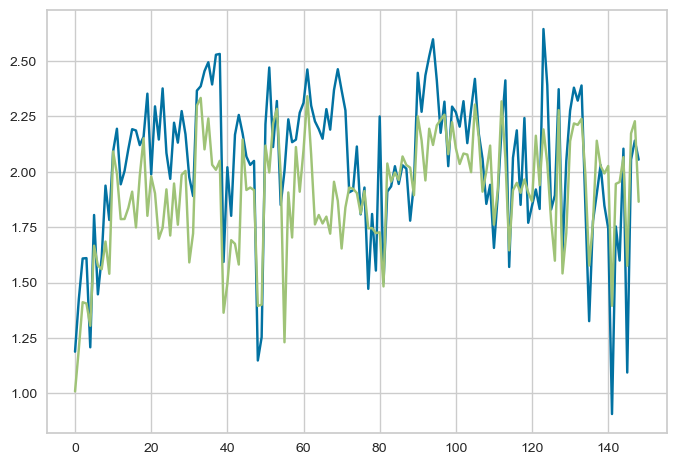

In [27]:
plt.plot(np.log(measured_y))
plt.plot(np.log(y_pred))
print(np.corrcoef(np.log(measured_y), np.log(y_pred))[0,1])

In [28]:
meas_rf = pd.DataFrame(measured_y)
pred_rf = pd.DataFrame(y_pred, columns = ['caroten'])

In [29]:
a, b = np.polyfit(meas_rf['carotenoid'], pred_rf['caroten'], deg = 1)

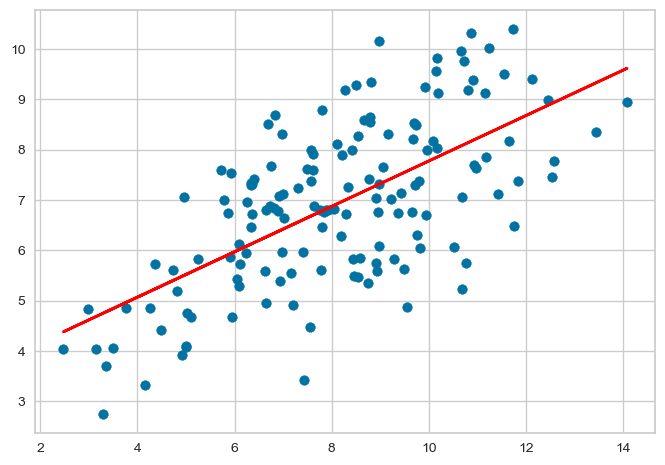

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
x = meas_rf['carotenoid']
y = pred_rf['caroten']
#xl=np.log(x)
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red', linestyle='-', linewidth=2)
#plt.grid(False)